# Tech Blues Capstone
## First Draft Notebook

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import wrangle
import tyler_explore

## Project Overview

## Project Planning

## Data Acquisition

In [2]:
# use our 'get_survey_data' function to bring in the data
df = wrangle.get_survey_data('survey.csv')

----------------------------------------------------
DataFrame Head
   Unnamed: 0            Timestamp  Age  Gender        Country state  \
0           0  2014-08-27 11:29:31   37  Female  United States    IL   
1           1  2014-08-27 11:29:37   44       M  United States    IN   
2           2  2014-08-27 11:29:44   32    Male         Canada   NaN   

  self_employed family_history treatment work_interfere  ...  \
0           NaN             No       Yes          Often  ...   
1           NaN             No        No         Rarely  ...   
2           NaN             No        No         Rarely  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some o

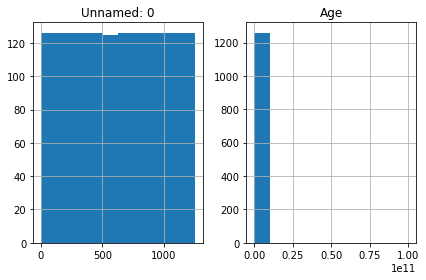

In [3]:
# Using summarize function to see head of dataframe, datatypes, amount of null values, stats, and value_counts
wrangle.summarize(df)

------

# Acquire Key Findings, Takeaways, and Next Steps:
- Good amount of nulls to drop or fill in 
- Choose to change some of the object datatypes to numeric datatype, decide what to drop, or decide what to use in modeling
- columns to encode to numeric datatype: gender, Country, self_employed, family history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys-health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence
- drop unnecassary columns: state and comments




------

## Data Preparation

In [4]:
# Make copy of dataframe to have encoded columns in a separate dataframe
encoded_df= df.copy()

In [5]:
encoded_df.head()

,Unnamed: 0,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
#dropping Unnamed column (unncessary column)
encoded_df= encoded_df.drop(columns='Unnamed: 0')

In [7]:
#Using prep strings function
encoded_df= wrangle.prep_the_strings(encoded_df)

In [8]:
#Verify nulls were filled in 
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  957 non-null    datetime64[ns]
 1   age                        957 non-null    int64         
 2   gender                     957 non-null    object        
 3   country                    957 non-null    object        
 4   self_employed              957 non-null    object        
 5   family_history             957 non-null    object        
 6   treatment                  957 non-null    object        
 7   work_interfere             957 non-null    object        
 8   no_employees               957 non-null    object        
 9   remote_work                957 non-null    object        
 10  tech_company               957 non-null    object        
 11  benefits                   957 non-null    object        
 12  care_op

In [9]:
#using prep encode function
encoded_df= wrangle.prep_encode(encoded_df)

In [10]:
#Looking at dataframe after prep functions
encoded_df.head()

,timestamp,age,gender,country,self_employed,family_history,treatment,work_interfere,company_size,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,1,United States,0,0,1,1,1,0,...,1,3,0,0,2,1,0,2,1,0
1,2014-08-27 11:29:37,44,0,United States,0,0,0,1,5,0,...,2,2,2,0,0,0,0,0,2,0
2,2014-08-27 11:29:44,32,0,Canada,0,0,0,1,1,0,...,2,1,0,0,1,1,1,1,0,0
4,2014-08-27 11:30:22,31,0,United States,0,0,0,0,3,1,...,2,2,0,0,2,1,1,1,2,0
5,2014-08-27 11:31:22,33,0,United States,0,1,0,1,1,0,...,2,2,0,0,1,1,0,2,2,0


In [11]:
#Looking at datatypes to verify it was changed
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  957 non-null    datetime64[ns]
 1   age                        957 non-null    int64         
 2   gender                     957 non-null    int64         
 3   country                    957 non-null    object        
 4   self_employed              957 non-null    int64         
 5   family_history             957 non-null    int64         
 6   treatment                  957 non-null    int64         
 7   work_interfere             957 non-null    int64         
 8   company_size               957 non-null    int64         
 9   remote_work                957 non-null    int64         
 10  tech_company               957 non-null    int64         
 11  benefits                   957 non-null    int64         
 12  care_op

**To prep this data before exploration, the following was done:**

|   Feature      | Description    | Encoding |
| :------------- | ----------- | -----------: |
| timestamp	|  Time survey was submitted | - |
| age	| Respondent age  | - |
| gender	| Respondent gender | male:0, female:1, other:2 |
| country	 |  Respondent survey  | Only kept N America and Europe |
| self_employed	 | Whether or not they were self employed | No:0, Yes:1 |
| family_history	| Whether or not they have a family history of mental illness | No:0, Yes:1 |
| treatment	 |  Whether or not they have sought treatment  | No:0, Yes:1 |
|  work_interfere	  |  If the person felt that the mental condition interfered with work | Never:0, Rarely:1, Sometimes:2, Often:3, NA:4 |
| no_employees	| The number of employees in the company or organization  | <5:0, 6-25:1, 26-100:2, 101-500:3, 501-1000:4, >1000:5 |
| remote_work	 | Having remote work (outside of an office) at least 50% of the time | No:0, Yes:1 |
| tech_company	| The employer is primarily a tech company/organization | No:0, Yes:1 |
| benefits  |	Providing mental health benefits by the employer | No:0, Yes:1, Don't know:2 |
| care_options |	Providing options for mental health care by the employer | No:0, Yes:1, Not sure:2 |
| wellness_program	| Discussion about mental health as part of an employee wellness program by the employees | No:0, Yes:1, Don't know:2 |
| seek_help	| Provided resources by the employer to learn more about mental health issues and how to seek help | No:0, Yes:1, Don't know:2 |
| anonymity |	Protecting anonymity if you choose to take advantage of mental health or substance abuse treatment resources | No:0, Yes:1, Don't know:2 |
| leave  |	How easy is it for you to take medical leave for a mental health condition? | Very difficult:0, Somewhat difficult:1, Don't know:2, Somewhat easy:3, Very easy:4 |
| mental-health_consequence |	Having negative consequences caused by discussing a mental health issue with your employer | No:0, Yes:1, Maybe:2 |
| phys-health_consequence	 | Having negative consequences caused by discussing a physical health issue with your employer  | No:0, Yes:1, Maybe:2 |
| coworkers |	Would you be willing to discuss a mental health issue with your coworkers? | No:0, Yes:1, Some of them:2 |
| supervisor	| Would you be willing to discuss a mental health issue with your direct supervisor(s)? | No:0, Yes:1, Some of them:2 |
| mental_health_interview  |	Would you bring up a mental health issue with a potential employer in an interview?  | No:0, Yes:1, Maybe:2 |
| phys_health_interview |	Would you bring up a physical health issue with a potential employer in an interview?  | No:0, Yes:1, Maybe:2 |
| mental_vs_physical |	Do you feel that your employer takes mental health as seriously as physical health? | No:0, Yes:1, Don't know:2 |
|  obs_consequence  |  Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?  | No:0, Yes:1 |

------

### Data Preparation Key Findings, Takeaways, and Next Steps:

- Chose to only include North America and Europe in our dataset: The economic status in these two countries are similar and this will give us more controlled variables with less bias in the data.
- The cleaning process had a moderate amount of nulls that needed to filled in or dropped 
- Deciding on what to fill nulls for each column was dependent on the column we were dealing with as you can see in the cell above.
- Initially decided to not one hot encode: will decide which columns to one hot encode once we find what features are drivers and what features are not.

------

## Data Exploration

### Univariate

#### Univariate - Key Findings, Takeaways, and Next Steps:

### Bivariate

#### Bivariate - Key Findings, Takeaways, and Next Steps:

### Multivariate

#### Multivariate - Key Findings, Takeaways, and Next Steps:

### Hypothesis Testing
#### Target Variable: 'work_interfere'

#### Hypothesis 1: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

In [ ]:
# Here is the work for hypothesis 1

#### Hypothesis 1 - Key Findings, Takeaways, and Next Steps:
- [insert hypothesis here]
- [reject or fail to reject the null]

#### Hypothesis 2: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

In [5]:
# Here is the work for hypothesis 2

#### Hypothesis 2 - Key Findings, Takeaways, and Next Steps:
- [insert hypothesis here]
- [reject or fail to reject the null]

#### Hypothesis 3: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

In [6]:
# Here is the work for hypothesis 3

#### Hypothesis 3 - Key Findings, Takeaways, and Next Steps:
- [insert hypothesis here]
- [reject or fail to reject the null]

#### Hypothesis 4: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 5: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 6: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 7: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 8: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 9: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 10: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

------

### Explore Key Findings, Takeaways, and Next Steps:

------

## Modeling

### Initital Setup

### Model 1: [insert model name here]

#### Model 1: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 2: [insert model name here]

#### Model 2: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 3: [insert model name here]

#### Model 3: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 4: [insert model name here]

#### Model 4: [insert model name here] - Key Findings, Takeaways, and Next Steps:

------

### Modeling Key Findings, Takeaways, and Next Steps:

------

### Summary - Key Findings, Takeaways, and Next Steps:

------